In [1]:

import numpy as np 

P = np.array([0.6,0.2,0.15,0.05])
Q = np.array([0.3,0.4,0.2,0.1])


In [2]:

# entropy formula: sumation of(P* ln(P))
entrophy = -np.sum(P*np.log(P))
entrophy


np.float64(1.0627375681569962)

In [ ]:

# cross entrophy: 
cross_entrophy = -np.sum(P*np.log(Q))
cross_entrophy

np.float64(1.2621867704852099)

In [4]:


#kl_divergence:
kl_divergence = cross_entrophy - entrophy
kl_divergence

np.float64(0.19944920232821373)

<br>
<br>


# `#01 kl_divergence_trizodal:`

<br>
<br>

In [3]:

import numpy as np 
import seaborn as sns 
from scipy.stats import norm 
import matplotlib.pyplot as plt 


In [28]:

# normal distribution: 1
mean1,std1 = 0,1
dist1 = norm(loc=mean1,scale=std1)

# normal distribution: 2
mean2,std2 = 10, 5
dist2 = norm(loc=mean2,scale=std2)
print("scipy return and object of normal distribution:\n  {} \n".format(dist1))
# define range for x-axis:
x_range = np.linspace(-5,7,1000)
print(x_range.shape)


scipy return and object of normal distribution:

(1000,)


In [29]:

# from normal distrution we will draw a pdf:
y1 =  dist1.pdf(x_range)
y2 = dist2.pdf(x_range)

print(f"shape of y1: {y1.shape} \n y2: {y2.shape}")


shape of y1: (1000,) 
 y2: (1000,)


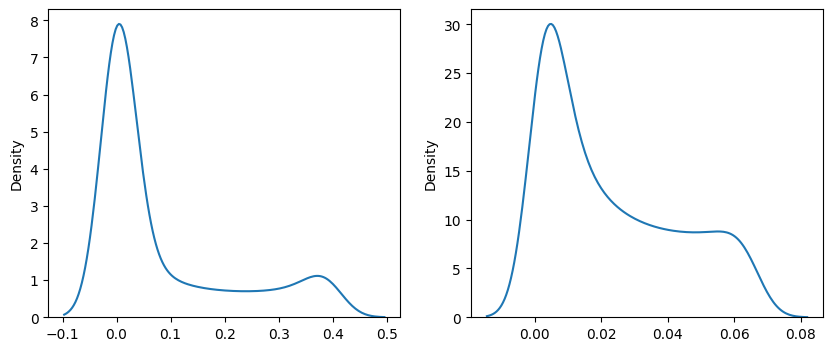

In [30]:

fig, (x1,x2) = plt.subplots(1,2,figsize=(10,4))

sns.kdeplot(y1,ax=x1)
sns.kdeplot(y2,ax=x2)
plt.show()

In [36]:


# trapezodial rule: implementation:
def trapezoidal_rule(func,lower_val,upper_val,n):
    del_x = (upper_val - lower_val)/n 
    x = np.linspace(start=lower_val,stop=upper_val,num=n+1)
    y = func(x)
    intregal = (del_x/2) * (y[0]+ (2*np.sum(y[1:n]) + y[n]))
    return intregal


# kl_divergence: implementation:
def kl_divergence(x):
    
    """ 
    log(p/q) : to avoid /0 we will use an epsilon for only q
    """
    epsilon = 1e-10
    
    # make the probability distribution function:
    # normal distribution: 1
    mean1,std1 = 0,1
    dist1 = norm(loc=mean1,scale=std1)

    # normal distribution: 2
    mean2,std2 = 10, 5
    dist2 = norm(loc=mean2,scale=std2)
    
    p = dist1.pdf(x)
    q = dist2.pdf(x)
    
    # /0 the condition or epcilon:
    p[q<epsilon] = 0
    q[q<epsilon] = epsilon
    
    return p * (np.log(p+epsilon)-np.log(q+epsilon)) 

a,b= -5,5
n_step = 1000 
kl_divergence = trapezoidal_rule(kl_divergence,a,b,n_step)
kl_divergence


np.float64(3.129443246218616)